# Algorithm Experiments

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re

## Graph (undirected)

In [2]:
G = nx.MultiGraph()

nodes = [i for i in range(1, 6)]
for n in nodes:
    G.add_node(n)

edges = [(1,2), (1,3), (3,2), (3,4), (4,5), (5,3)]
for e in edges:
    G.add_edge(*e)

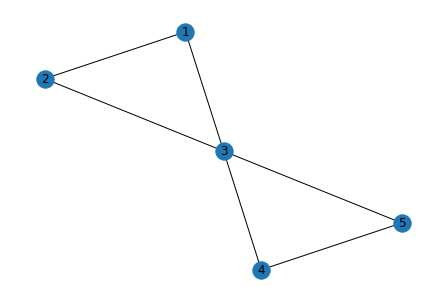

In [3]:
nx.draw(G, with_labels=True)

## Graph (directed)

In [4]:
G = nx.DiGraph()
    
edges = [
    {"u_of_edge": 1, "v_of_edge":2, "weight": 10},
    {"u_of_edge": 2, "v_of_edge":1, "weight": 5},
    {"u_of_edge": 3, "v_of_edge":1, "weight": 4},
    {"u_of_edge": 1, "v_of_edge":3, "weight": 2},
    {"u_of_edge": 3, "v_of_edge":2, "weight": 9},
    {"u_of_edge": 2, "v_of_edge":3, "weight": 6},
    {"u_of_edge": 3, "v_of_edge":4, "weight": 1},
    {"u_of_edge": 4, "v_of_edge":3, "weight": 2},
    {"u_of_edge": 4, "v_of_edge":5, "weight": 8},
    {"u_of_edge": 5, "v_of_edge":4, "weight": 8},
    {"u_of_edge": 5, "v_of_edge":3, "weight": 6},
    {"u_of_edge": 3, "v_of_edge":5, "weight": 4},
]
for e in edges:
    G.add_edge(**e) 

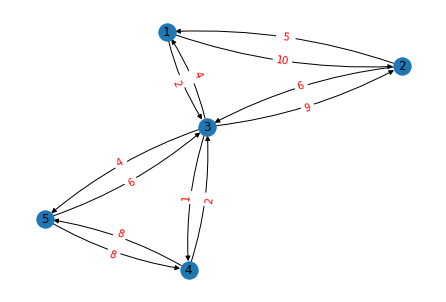

In [5]:
pos = nx.spring_layout(G,seed=5)

edge_labels = {}
for u, v, d in G.edges(data=True):
    if pos[u][0] > pos[v][0]:
        w1 = d["weight"]
        w2 = G.edges[(v,u)]["weight"]
        edge_labels[(u,v)] = f'{w1}\n\n{w2}'

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

## Visuals

In [6]:
def gen_df_from_init():
    columns = [
        "start_time",
        "instance_name",
        "nr_odd_vertices",
        "comparissons",
        "total_time_shortest_path",
        "solver_init",
        "nr_constraints",
        "nr_variables",
        "minimum_cost_matching",
        "add_to_graph_set",
        "check_even_arc",
        "get_arcs",
        "calc_minimum_cost_flow",
        "cost_flow",
        "construct_final_digraph",
        "euler_tour",
        "total_cost"
    ]
    df = pd.DataFrame(columns=columns)

    filename = "log.txt"
    with open(filename, "r") as f:
        l = f.readlines()
        for i in range(0, len(l), 32):
            lines = l[i:i+32]
            lines = [line for line in lines if line != "\n"]

            import pprint
            pp = pprint.PrettyPrinter(width=41, compact=True)
            pp.pprint(lines)
            entry = []
            
            entry.append(re.findall("\d{2}:\d{2}:\d{2}", lines[0])[0]) # start time
            entry.append(lines[1].split(":")[1].strip()) # instance name
            entry.append(re.findall("\d+", lines[5])[1]) # nr odd vertices
            entry.append(re.findall("\d+", lines[6])[0]) # comparisson
            entry.append(re.findall("\d+", lines[7])[0]) # total time for shorest path
            #entry.append(re.findall("\d+", lines[9])[0]) # solver init
            #entry.append(re.findall("\d+", lines[11])[0]) # constraints
            #entry.append(re.findall("\d+", lines[12])[0]) # variables
            #entry.append(re.findall("\d+", lines[14])[0]) # Find minimum cost perfect matching 
            #entry.append(float(lines[16])) # add to eulerian graph set
            #entry.append(float(lines[21]))  # even for each arc
            #entry.append(float(lines[23]))  # get arcs again
            #entry.append(float(lines[25]))  # calculate minimum cost flow
            #entry.append(re.findall("\d+", lines[26])[0])  # cost flow
            #entry.append(float(lines[28])) # final digraph construction
            #entry.append(float(lines[30]))  # euler tour
            #entry.append(re.findall("\d+", lines[33])[0]) #total cost
            print(entry)

            df.loc[len(df.index)] = entry
    return df

In [7]:
def gen_df_from_init2():
    columns = [
        "start_time",
        "instance_name",
        "nr_odd_vertices",
        "comparissons",
        "total_time_shortest_path",
        "minimum_cost_flow",
        "total_cost"
    ]
    df = pd.DataFrame(columns=columns)

    filename = "log.txt"
    with open(filename, "r") as f:
        l = f.readlines()
        for i in range(0, len(l), 32):
            lines = l[i:i+32]
            lines = [line for line in lines if line != "\n"]

            try:
                entry = []
                entry.append(re.findall("\d{2}:\d{2}:\d{2}", lines[0])[0]) # start time
                entry.append(lines[1].split(":")[1].strip()) # instance name
                entry.append(re.findall("\d+", lines[5])[1]) # nr odd vertices
                entry.append(re.findall("\d+", lines[6])[0]) # comparisson
                entry.append(re.findall("\d+\.\d+", lines[7])[0]) # total time for shorest path
                entry.append(re.findall("\d+", lines[21])[0])  #  minimum cost flow
                entry.append(re.findall("\d+", lines[-1])[0])  #  total_cost
            except:
                import pprint
                pp = pprint.PrettyPrinter(width=41, compact=True)
                pp.pprint(lines)

            df.loc[len(df.index)] = entry
    return df

In [8]:
df = gen_df_from_init2()
df.shape

(120, 7)

In [9]:
df.head()

,start_time,instance_name,nr_odd_vertices,comparissons,total_time_shortest_path,minimum_cost_flow,total_cost
0,13:14:07,Toy,6,15,0.10132670402526855,3900,219
1,13:14:08,WA0531,284,40186,2.6565630435943604,988800,530782
2,13:14:13,WA0532,252,31626,2.5802531242370605,1989700,497704
3,13:14:17,WA0535,262,34191,2.6452503204345703,4741700,481554
4,13:14:21,WA0541,264,34716,2.7168679237365723,886500,591697


In [10]:
df["total_time_shortest_path"].max()

'8.182003498077393'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   start_time                120 non-null    object
 1   instance_name             120 non-null    object
 2   nr_odd_vertices           120 non-null    object
 3   comparissons              120 non-null    object
 4   total_time_shortest_path  120 non-null    object
 5   minimum_cost_flow         120 non-null    object
 6   total_cost                120 non-null    object
dtypes: object(7)
memory usage: 7.5+ KB


In [12]:
x = df.iloc[0]
df = df.drop([0,1])

In [13]:
df["start_time"] = pd.to_datetime(df["start_time"])
df["nr_odd_vertices"] = pd.to_numeric(df["nr_odd_vertices"])
df["comparissons"] = pd.to_numeric(df["comparissons"])
#df["total_time_shortest_path"] = pd.to_timedelta(df["total_time_shortest_path"])
#df["solver_init"] = pd.to_datetime(df["solver_init"])
#df["nr_constraints"] = pd.to_numeric(df["nr_constraints"])
#df["nr_variables"] = pd.to_numeric(df["nr_variables"])
#df["minimum_cost_matching"] = pd.to_datetime(df["minimum_cost_matching"])
#df["add_to_graph_set"] = pd.to_datetime(df["add_to_graph_set"])
#df["check_even_arc"] = pd.to_datetime(df["check_even_arc"])
#df["get_arcs"] = pd.to_datetime(df["get_arcs"])
#df["calc_minimum_cost_flow"] = pd.to_datetime(df["calc_minimum_cost_flow"])
df["minimum_cost_flow"] = pd.to_numeric(df["minimum_cost_flow"])
#df["cost_flow"] = pd.to_numeric(df["cost_flow"])
#df["construct_final_digraph"] = pd.to_datetime(df["construct_final_digraph"])
#df["euler_tour"] = pd.to_datetime(df["euler_tour"])
df["total_cost"] = pd.to_numeric(df["total_cost"])

In [14]:
df["start_time"].diff()

2                 NaT
3     0 days 00:00:04
4     0 days 00:00:04
5     0 days 00:00:05
6     0 days 00:00:05
            ...      
115   0 days 00:01:56
116   0 days 00:01:52
117   0 days 00:01:57
118   0 days 00:01:50
119   0 days 00:01:49
Name: start_time, Length: 118, dtype: timedelta64[ns]

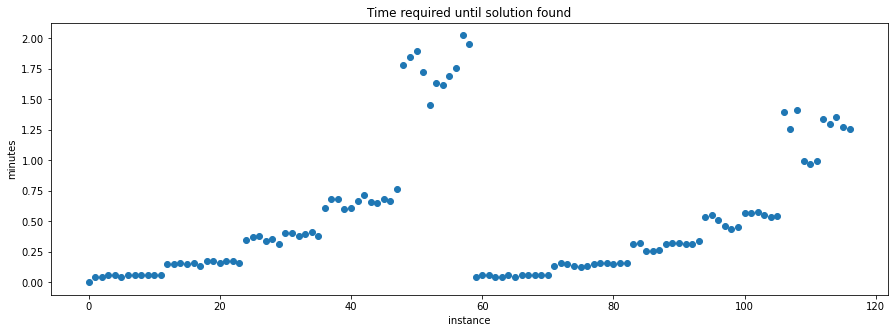

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
x = df["start_time"].diff()
x[2] = 0
x = pd.to_timedelta(x)
ax.plot(1-np.delete(1-mdates.date2num(pd.to_timedelta(x)), 84), "o", axes=ax)
ax.set_xlabel("instance")
ax.set_ylabel("minutes")
ax.set_title("Time required until solution found")
plt.show()
fig.savefig("minutes")


KeyError: 'nr_variables'

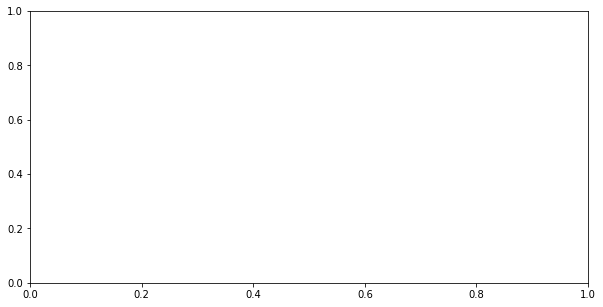

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df["nr_variables"], ax=ax)
fig.savefig("integer_nr_variables")

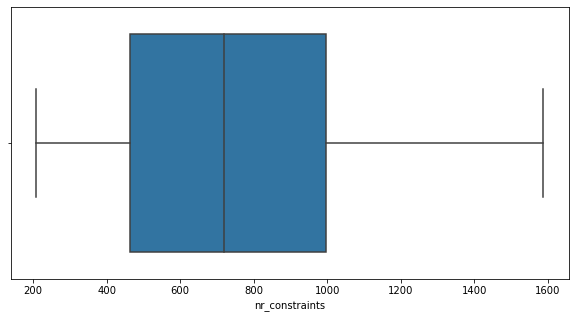

In [257]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df["nr_constraints"], ax=ax)
fig.savefig("integer_nr_constraints")

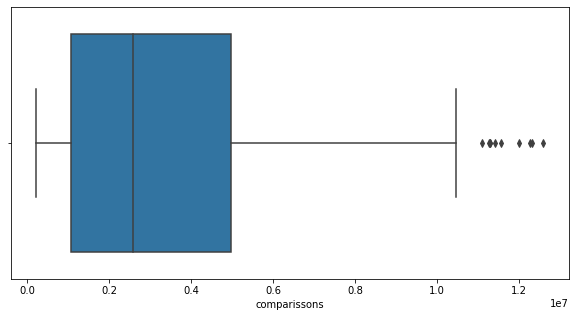

In [258]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df["comparissons"], ax=ax)
fig.savefig("integer_comparissons")

In [259]:
df.columns

Index(['start_time', 'instance_name', 'nr_odd_vertices', 'comparissons',
       'total_time_shortest_path', 'solver_init', 'nr_constraints',
       'nr_variables', 'minimum_cost_matching', 'add_to_graph_set',
       'check_even_arc', 'get_arcs', 'calc_minimum_cost_flow', 'cost_flow',
       'construct_final_digraph', 'euler_tour', 'total_cost'],
      dtype='object')

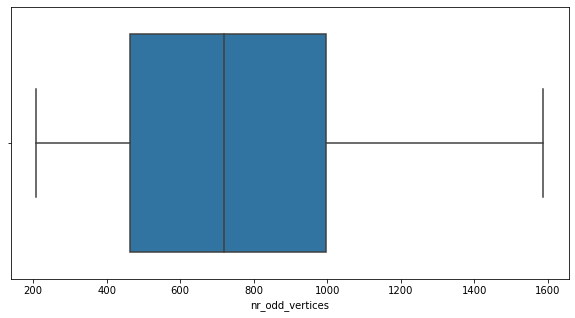

In [260]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df["nr_odd_vertices"], ax=ax)
fig.savefig("nr_odd_vertices")

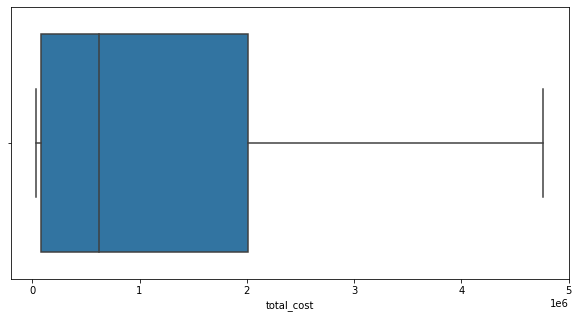

In [261]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df["total_cost"], ax=ax)
fig.savefig("total_cost")

# Naive vs Win

In [18]:
df = gen_df_from_init()
df

['---The current starting time is: '
 '13:14:07\n',
 'NOMBRE : Toy \n',
 'COMENTARIO :  Toy instance for the '
 'Windy Postman Problem (WPP)\n',
 'Graph is NOT eulerian! - Starting the '
 'conversion to eulerian proc\n',
 '2.(a) complete\n',
 '2.(b) - first part complete, we have: '
 '6 odd vertices\n',
 'this gives us in total: 15.0 '
 'comparisons\n',
 '<<TOTAL-TIME-FOR-SHORTEST-PATH: '
 '0.10132670402526855>>>>>>>>>>>\n',
 '2.(b) complete\n',
 '0.005919694900512695\n',
 '2.(c) complete\n',
 '0.00011205673217773438\n',
 '2.(d) - complete\n',
 'Eulerian conversion complete\n',
 'PARSE_TO_FILE\n',
 '3.(0) - Starting wins_algorithm\n',
 '0.00015974044799804688\n',
 '3.(1) - complete\n',
 '2.4080276489257812e-05\n',
 '3.(2) - complete\n',
 '0.00019097328186035156\n',
 'Minimum Flow cost:  3900\n',
 '3.(3) - complete\n',
 '0.00011539459228515625\n',
 'Final digraph constructed\n',
 '0.0001304149627685547\n',
 '<<<<EULER-TOUR-COMPLETE>>>>\n',
 '<<<<WPP-TOUR>>>>\n',
 '[1, 2, 3, 4, 5, 3, 5, 

ValueError: cannot set a row with mismatched columns

In [263]:
df.iloc[0]

start_time                              20:37:11
instance_name                                Toy
nr_odd_vertices                                6
comparissons                                 150
total_time_shortest_path      006317806243896484
solver_init                  0002052783966064453
nr_constraints                                 6
nr_variables                                  15
minimum_cost_matching       00013680458068847656
add_to_graph_set               67710876464.84375
check_even_arc                87261199951.171875
get_arcs                       16212463378.90625
calc_minimum_cost_flow       13256072998046876.0
cost_flow                                   3800
construct_final_digraph       66995620727.539062
euler_tour                    80347061157.226562
total_cost                                   222
Name: 0, dtype: object

"""
NOMBRE : WA0551 

COMENTARIO :  Chino Windy aleatorio puro

Graph is NOT eulerian! - Starting the conversion to eulerian proc
2.(a) complete
2.(b) - first part complete, we have: 250 odd vertices
this gives us in total: 31125.0 comparisons
<<TOTAL-TIME-FOR-SHORTEST-PATH: 1.862365961074829>>>>>>>>>>>
2.(b) complete
0.8692455291748047
<<<Solver Init complete, now starting solver>>
CONSTRAINTS:  250
VARIABLES:  31125
Solution:
1.7146565914154053
2.(c) complete
0.01058816909790039
2.(d) - complete
Eulerian conversion complete
PARSE_TO_FILE
3.(0) - Starting wins_algorithm
0.11217498779296875
3.(1) - complete
0.0006220340728759766
3.(2) - complete
0.012308835983276367
Minimum Flow cost:  824200
3.(3) - complete
0.041550636291503906
Final digraph constructed
ARCSPRIMEPRIME:
blabla
0.01825571060180664
<<<<EULER-TOUR-COMPLETE>>>>
<<<<WPP-TOUR>>>>
[1, 75, 81, 56, 24, 146, 167, 208, 197, 9, 20, 3, 129, 94, 17, 132, 117, 283, 22, 267, 351, 4, 151, 123, 36, 39, 219, 391, 124, 87, 248, 49, 367, 43, 30, 329, 254, 161, 9, 37, 208, 216, 290, 34, 50, 117, 303, 44, 145, 15, 13, 238, 28, 263, 45, 153, 293, 38, 264, 212, 180, 7, 47, 134, 41, 463, 29, 19, 66, 62, 70, 57, 52, 68, 15, 38, 310, 137, 338, 321, 170, 2, 141, 78, 18, 14, 324, 121, 8, 15, 58, 77, 72, 27, 173, 226, 340, 236, 10, 51, 94, 46, 273, 112, 97, 52, 355, 118, 164, 58, 176, 225, 40, 144, 121, 53, 86, 11, 247, 21, 107, 28, 462, 50, 312, 71, 78, 125, 233, 251, 64, 252, 416, 74, 216, 381, 69, 50, 312, 127, 198, 40, 406, 17, 284, 2, 274, 49, 388, 66, 149, 158, 29, 320, 255, 142, 275, 152, 143, 147, 45, 332, 16, 85, 318, 65, 7, 107, 301, 243, 52, 384, 56, 231, 89, 138, 397, 15, 216, 448, 63, 136, 194, 302, 162, 67, 252, 440, 169, 193, 85, 370, 64, 259, 304, 184, 231, 277, 290, 103, 390, 37, 9, 158, 179, 443, 121, 117, 329, 268, 98, 57, 303, 80, 210, 27, 258, 160, 23, 230, 148, 87, 474, 104, 109, 63, 173, 238, 29, 449, 195, 118, 225, 271, 266, 13, 345, 294, 154, 17, 337, 1, 406, 191, 448, 181, 472, 139, 174, 44, 362, 204, 267, 406, 320, 276, 186, 8, 248, 119, 153, 432, 245, 45, 378, 139, 175, 8, 473, 65, 9, 327, 91, 214, 64, 304, 238, 79, 25, 125, 78, 218, 424, 344, 12, 112, 228, 143, 147, 99, 17, 399, 72, 97, 241, 309, 59, 91, 294, 270, 173, 387, 289, 9, 367, 55, 69, 363, 322, 77, 132, 228, 158, 297, 90, 485, 325, 241, 461, 3, 329, 380, 185, 221, 180, 237, 133, 154, 272, 253, 232, 188, 30, 339, 94, 46, 296, 113, 252, 416, 421, 162, 156, 95, 227, 24, 161, 247, 182, 123, 151, 340, 267, 146, 267, 351, 63, 264, 269, 63, 270, 225, 271, 393, 13, 345, 296, 404, 464, 75, 282, 40, 451, 86, 215, 115, 153, 458, 375, 33, 59, 190, 263, 280, 455, 135, 67, 366, 31, 119, 344, 157, 42, 61, 293, 333, 76, 54, 237, 242, 268, 120, 186, 317, 116, 26, 144, 291, 397, 234, 7, 429, 195, 141, 257, 53, 257, 172, 182, 313, 10, 396, 20, 196, 316, 49, 367, 331, 244, 176, 430, 15, 430, 140, 412, 108, 189, 234, 180, 418, 2, 298, 263, 309, 355, 316, 292, 150, 141, 454, 144, 26, 180, 454, 192, 479, 185, 332, 61, 295, 46, 352, 83, 452, 3, 380, 236, 173, 387, 351, 338, 333, 79, 133, 188, 322, 118, 248, 196, 493, 211, 114, 134, 240, 46, 382, 79, 275, 315, 44, 362, 365, 96, 16, 162, 431, 98, 403, 272, 475, 45, 446, 5, 22, 305, 147, 302, 201, 119, 460, 99, 132, 307, 2, 316, 355, 415, 71, 85, 383, 129, 158, 378, 304, 487, 159, 103, 390, 300, 181, 448, 213, 348, 115, 186, 336, 33, 193, 273, 339, 371, 227, 47, 241, 47, 482, 100, 42, 459, 71, 358, 88, 135, 172, 250, 245, 256, 14, 375, 43, 161, 247, 446, 177, 102, 313, 294, 431, 214, 307, 273, 429, 204, 355, 415, 184, 337, 119, 31, 314, 126, 20, 335, 105, 133, 222, 135, 248, 342, 166, 221, 194, 314, 202, 38, 438, 30, 487, 188, 232, 412, 279, 28, 489, 96, 35, 236, 203, 142, 292, 295, 174, 312, 300, 361, 262, 2, 402, 120, 217, 287, 406, 17, 437, 140, 412, 443, 122, 19, 162, 457, 262, 34, 190, 362, 374, 91, 322, 229, 96, 46, 296, 163, 296, 497, 18, 484, 43, 310, 138, 465, 166, 270, 323, 350, 127, 334, 253, 340, 236, 490, 34, 228, 451, 101, 70, 92, 450, 480, 27, 480, 177, 280, 455, 150, 235, 183, 291, 457, 306, 438, 72, 317, 415, 203, 325, 249, 14, 398, 73, 293, 73, 318, 74, 233, 459, 129, 410, 222, 344, 446, 427, 326, 427, 446, 323, 382, 363, 350, 149, 392, 80, 226, 357, 330, 262, 250, 246, 28, 462, 66, 283, 263, 391, 275, 374, 199, 233, 459, 335, 105, 239, 275, 468, 193, 325, 420, 260, 393, 437, 494, 108, 258, 298, 320, 423, 255, 456, 110, 100, 156, 95, 237, 381, 369, 104, 152, 154, 492, 100, 182, 319, 341, 54, 338, 346, 170, 439, 65, 337, 223, 327, 297, 289, 147, 302, 93, 302, 403, 405, 200, 445, 95, 284, 373, 52, 68, 65, 407, 58, 214, 443, 121, 303, 365, 186, 276, 243, 254, 190, 401, 11, 464, 389, 493, 264, 356, 233, 74, 364, 24, 246, 244, 262, 305, 479, 210, 171, 349, 38, 438, 306, 481, 64, 410, 231, 325, 473, 250, 418, 150, 290, 320, 435, 142, 301, 298, 468, 385, 97, 396, 473, 483, 229, 135, 412, 482, 244, 299, 51, 104, 333, 403, 425, 130, 452, 265, 45, 378, 492, 311, 264, 464, 419, 338, 321, 495, 187, 98, 268, 486, 240, 425, 145, 187, 199, 265, 316, 292, 467, 206, 452, 477, 265, 375, 385, 224, 448, 499, 10, 405, 347, 220, 342, 310, 343, 48, 329, 497, 299, 105, 493, 442, 319, 434, 319, 344, 424, 387, 368, 387, 487, 199, 269, 157, 84, 157, 111, 262, 325, 249, 59, 221, 261, 266, 24, 314, 432, 277, 359, 97, 426, 145, 204, 447, 116, 148, 116, 432, 414, 212, 300, 212, 414, 254, 402, 120, 219, 391, 289, 420, 392, 441, 78, 297, 495, 187, 285, 77, 350, 500, 82, 327, 358, 205, 64, 457, 409, 166, 350, 127, 198, 475, 209, 232, 453, 86, 472, 255, 476, 88, 248, 442, 481, 397, 460, 278, 48, 278, 202, 213, 348, 155, 6, 95, 445, 99, 168, 70, 62, 102, 398, 197, 187, 483, 409, 282, 238, 452, 3, 32, 3, 386, 257, 176, 451, 187, 491, 262, 358, 205, 324, 273, 307, 436, 307, 407, 373, 216, 478, 111, 385, 294, 498, 47, 482, 314, 126, 239, 136, 239, 286, 104, 60, 104, 109, 209, 232, 453, 106, 246, 342, 444, 112, 397, 460, 419, 366, 160, 107, 301, 370, 286, 79, 286, 337, 441, 466, 75, 389, 75, 288, 178, 476, 243, 418, 313, 10, 435, 167, 279, 499, 99, 353, 31, 375, 441, 78, 315, 451, 228, 474, 150, 359, 97, 72, 444, 223, 376, 207, 244, 348, 155, 370, 361, 282, 40, 486, 362, 425, 149, 477, 445, 257, 231, 465, 168, 164, 445, 308, 137, 310, 372, 17, 284, 471, 444, 281, 351, 440, 474, 175, 360, 172, 250, 418, 439, 410, 247, 467, 270, 490, 106, 328, 117, 491, 369, 493, 211, 114, 164, 58, 263, 458, 375, 43, 417, 354, 199, 320, 435, 256, 247, 493, 442, 499, 457, 499, 129, 499, 134, 403, 272, 80, 272, 489, 308, 312, 362, 374, 422, 68, 210, 171, 361, 401, 242, 426, 201, 383, 264, 311, 270, 490, 139, 294, 498, 59, 366, 67, 444, 497, 347, 409, 404, 496, 108, 287, 413, 65, 433, 83, 352, 308, 470, 235, 183, 488, 405, 488, 312, 174, 342, 444, 113, 444, 281, 440, 150, 440, 169, 327, 441, 466, 138, 89, 353, 108, 394, 23, 230, 394, 334, 346, 221, 333, 76, 380, 372, 19, 196, 494, 108, 189, 356, 429, 242, 496, 357, 330, 421, 377, 411, 6, 422, 354, 328, 142, 318, 258, 487, 236, 203, 385, 474, 240, 425, 424, 461, 4, 461, 328, 251, 208, 331, 400, 290, 408, 299, 51, 133, 250, 262, 369, 262, 461, 437, 393, 470, 475, 11, 475, 482, 478, 111, 484, 101, 187, 101, 217, 364, 249, 426, 424, 218, 497, 299, 408, 363, 322, 77, 449, 208, 197, 370, 476, 453, 411, 491, 401, 463, 68, 372, 36, 59, 421, 377, 131, 377, 439, 454, 409, 454, 474, 376, 207, 484, 204, 492, 479, 395, 12, 197, 472, 86, 489, 433, 21, 433, 439, 449, 195, 371, 227, 268, 120, 487, 411, 128, 411, 6, 435, 388, 141, 257, 237, 381, 431, 334, 346, 245, 256, 14, 469, 404, 464, 428, 464, 473, 55, 473, 483, 463, 190, 413, 65, 165, 65, 68, 388, 429, 275, 152, 274, 121, 426, 201, 456, 358, 88, 498, 398, 222, 432, 485, 349, 41, 463, 466, 336, 266, 199, 265, 485, 432, 277, 364, 462, 96, 244, 463, 485, 422, 470, 308, 352, 386, 318, 230, 471, 61, 332, 149, 158, 407, 341, 407, 365, 186, 115, 379, 1]
Total cost of: 681537
( python3 wins_algorithm.py instances/WA0551; )  5.78s user 1.93s system 134% cpu 5.713 total
"""

# compare to optimal best


In [24]:
from pathlib import Path
p = Path("./tours")

In [25]:
files = [x for x in list(p.glob("*")) if "naive" not in str(x)]
files = [x for x in files if "parallel" not in str(x)]
files = [x for x in files if "toy" not in str(x)]
files = [x for x in files if "e_tour" not in str(x)]
files

[PosixPath('tours/WB3041_tour'),
 PosixPath('tours/WB0551_tour'),
 PosixPath('tours/WA2032_tour'),
 PosixPath('tours/WA3065_tour'),
 PosixPath('tours/WA2065_tour'),
 PosixPath('tours/WB3061_tour'),
 PosixPath('tours/WB1531_tour'),
 PosixPath('tours/WB3062_tour'),
 PosixPath('tours/WB3045_tour'),
 PosixPath('tours/WB1562_tour'),
 PosixPath('tours/WB2035_tour'),
 PosixPath('tours/WB3051_tour'),
 PosixPath('tours/WA0535_tour'),
 PosixPath('tours/WA2031_tour'),
 PosixPath('tours/WA1062_tour'),
 PosixPath('tours/WA1561_tour'),
 PosixPath('tours/WB1031_tour'),
 PosixPath('tours/WB0545_tour'),
 PosixPath('tours/WB1065_tour'),
 PosixPath('tours/WB1041_tour'),
 PosixPath('tours/WB1055_tour'),
 PosixPath('tours/WA2035_tour'),
 PosixPath('tours/WA0562_tour'),
 PosixPath('tours/WB2052_tour'),
 PosixPath('tours/WB1561_tour'),
 PosixPath('tours/WA1045_tour'),
 PosixPath('tours/WA2062_tour'),
 PosixPath('tours/WB3052_tour'),
 PosixPath('tours/WB1032_tour'),
 PosixPath('tours/WA1541_tour'),
 PosixPath

In [26]:
df2 = pd.DataFrame(columns=["instance_name", "cost"])

In [27]:
test = "./WPP.txt"
with open(test, "r") as f:
    for j,i in enumerate(f.readlines()):
        instance, cost, _ = i.split("	")
        cost = cost.split(",")[0]
        df2.loc[j] = [instance, cost]
df2

,instance_name,cost
0,WA0531,530782
1,WA0532,496962
2,WA0535,480531
3,WA0541,591697
4,WA0542,581689
...,...,...
115,WB3052,141355
116,WB3055,132845
117,WB3061,178341
118,WB3062,177210


In [28]:
df3 = pd.merge(df, df2, on="instance_name", how="inner")

In [29]:
df3["cost"] = pd.to_numeric(df3["cost"])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   start_time                118 non-null    datetime64[ns]
 1   instance_name             118 non-null    object        
 2   nr_odd_vertices           118 non-null    int64         
 3   comparissons              118 non-null    int64         
 4   total_time_shortest_path  118 non-null    object        
 5   minimum_cost_flow         118 non-null    int64         
 6   total_cost                118 non-null    int64         
 7   cost                      118 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 8.3+ KB


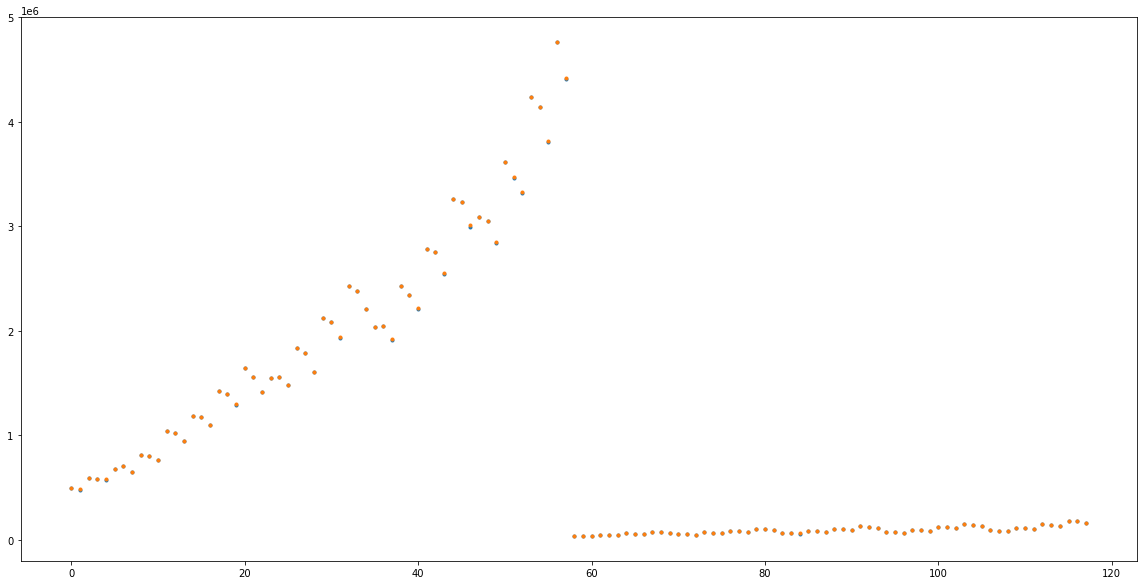

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(df3["cost"], ".", axes=ax)
plt.plot(df3["total_cost"], ".", axes=ax)
plt.show()

<AxesSubplot:>

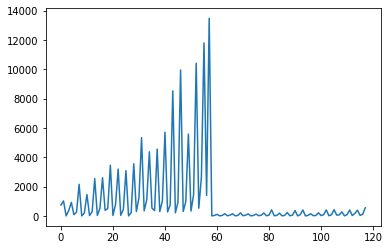

In [31]:

df4 = df3["total_cost"] - df3["cost"]
df4.plot()

In [32]:
df3_WA = df3[df3["instance_name"].str.contains("WA")]
df3_WB = df3[df3["instance_name"].str.contains("WB")]

In [33]:
len(labels), len(men_means), len(women_means)

NameError: name 'labels' is not defined

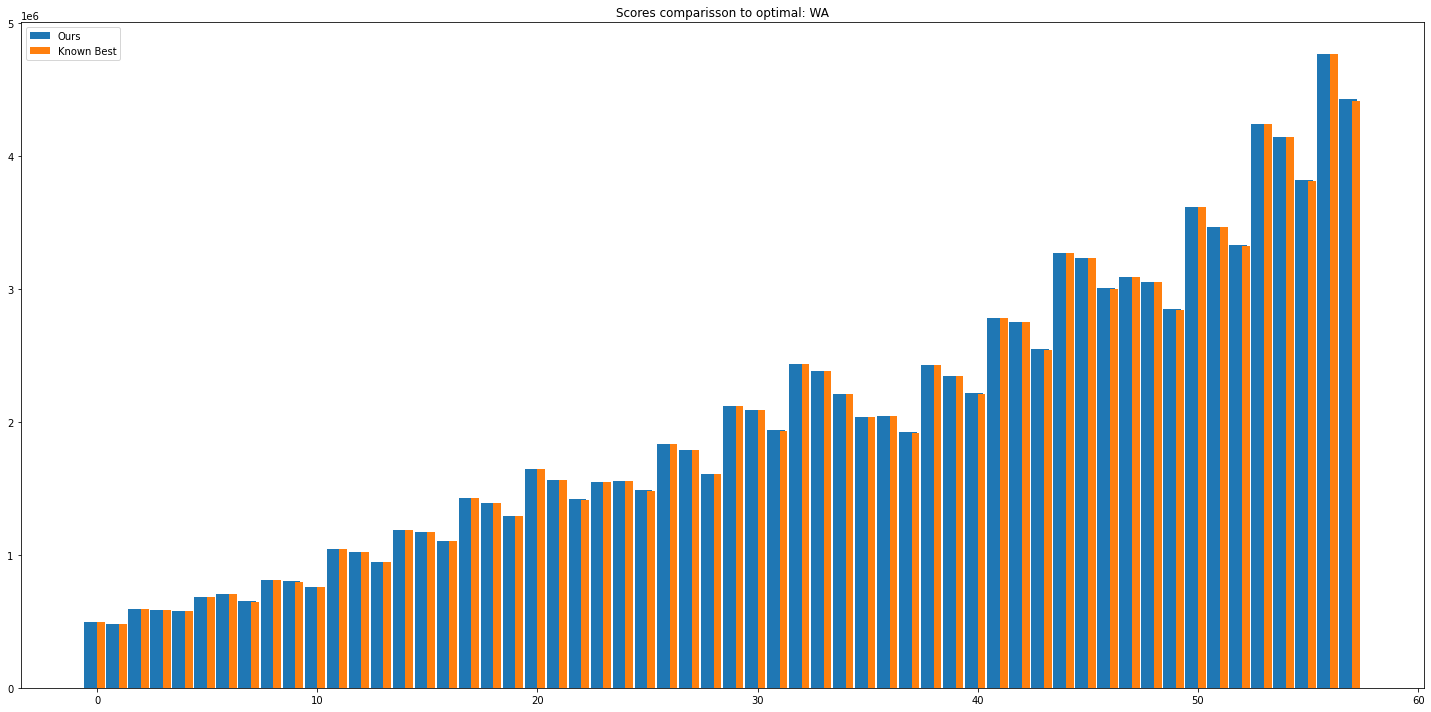

In [44]:
men_means = df3_WA["total_cost"].to_numpy()
women_means = df3_WA["cost"].to_numpy()
labels = np.array([i for i in range(len(men_means))])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, men_means, label='Ours')
rects2 = ax.bar(x + width/2, women_means, width, label='Known Best')

# Add some text for labels, title and cust

ax.set_title('Scores comparisson to optimal: WA')
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
fig.savefig("score_compare_WA")

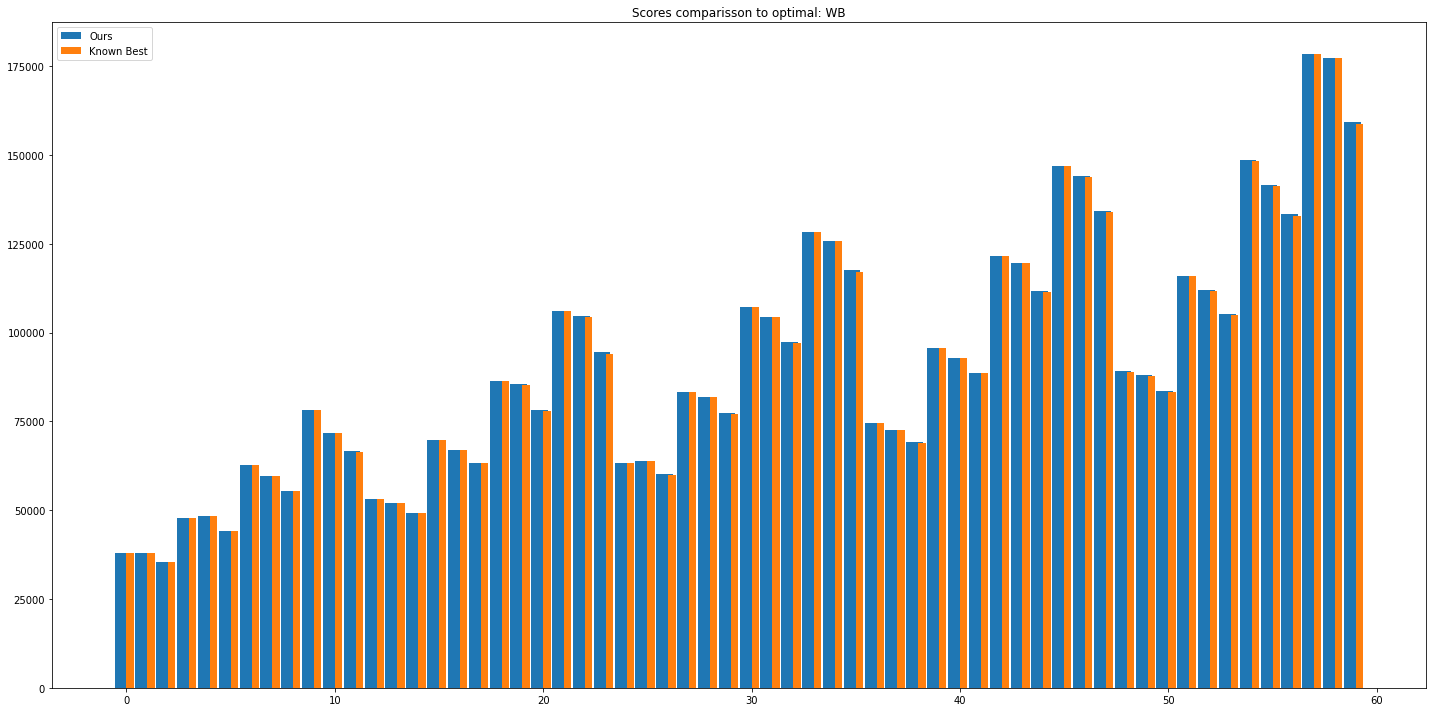

In [45]:
men_means = df3_WB["total_cost"].to_numpy()
women_means = df3_WB["cost"].to_numpy()
labels = np.array([i for i in range(len(men_means))])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, men_means, label='Ours')
rects2 = ax.bar(x + width/2, women_means, width, label='Known Best')

# Add some text for labels, title and cust

ax.set_title('Scores comparisson to optimal: WB')
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
fig.savefig("score_compare_WB")

In [38]:
import re
import pandas as pd

filename = "compare.txt"
with open(filename, "r") as f:
    lines = f.readlines()
    instances = set(i.split(":")[1].strip() for i in lines if "NOMBRE" in i)
    naive_times = [re.findall("\d+.\d+", l.strip())[0] for l in lines if "wall time" in l]
    
naive_times, instances

FileNotFoundError: [Errno 2] No such file or directory: 'compare.txt'

In [39]:
win = """
real	0m3.270s
user	0m3.460s
sys	0m1.858s

real	0m3.128s
user	0m3.332s
sys	0m1.853s

real	0m3.195s
user	0m3.385s
sys	0m1.861s

real	0m3.166s
user	0m3.356s
sys	0m1.880s

real	0m3.266s
user	0m3.457s
sys	0m1.865s

real	0m3.418s
user	0m3.608s
sys	0m1.861s
"""

In [40]:
win_times = [v for i, v in enumerate(re.findall("\d+\.\d+", win)) if i % 3 == 0]
win_times

['3.270', '3.128', '3.195', '3.166', '3.266', '3.418']

In [41]:
df = pd.DataFrame(columns=["type", "instance", "time"])

In [42]:
for i, j in zip(instances, win_times):
    df.loc[len(df.index)] = ["win", i, j]
df

NameError: name 'instances' is not defined

In [36]:
for i, j in zip(instances, naive_times):
    df.loc[len(df.index)] = ["naive", i, j]
df

,type,instance,time
0,win,WB0531,3.270
1,win,WA0532,3.128
2,win,WB0532,3.195
3,win,WA0531,3.166
4,win,WB0535,3.266
5,win,WA0535,3.418
6,naive,WB0531,189.55543778
7,naive,WA0532,12.540412304
8,naive,WB0532,150.214480591
9,naive,WA0531,71.351307358


In [41]:
df["time"] = pd.to_numeric(df["time"])

/usr/lib/python3.10/site-packages/seaborn/relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


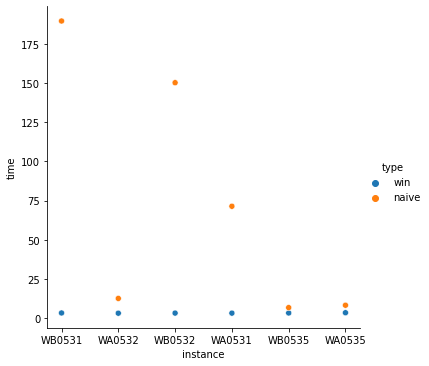

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x="instance", y="time", hue="type", data=df, ax=ax)
plt.savefig("compare")